In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Question 1.2a

In [7]:
def generate_sample(seed, n):
    np.random.seed(seed)
    x_vals = np.random.uniform(0, 2*np.pi, n)
    y_vals = np.random.normal(np.sin(x_vals), 0.2)
    return x_vals, y_vals

In [8]:
x_vals = generate_sample(428, 30)[0]
y_vals = generate_sample(428, 30)[1]
degrees = [0,1,2,3,29]

## Question 1.2b

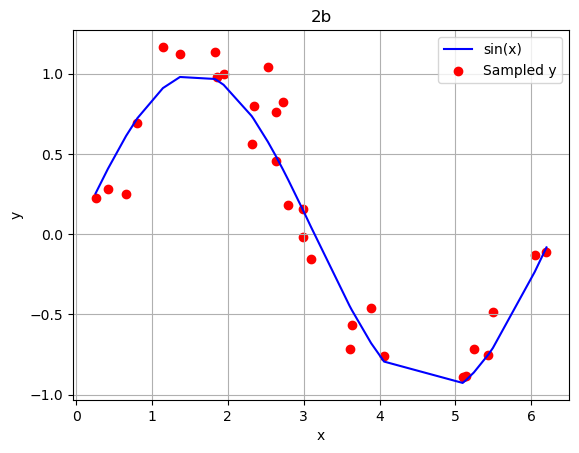

array([5.14231016, 5.49410688, 2.6292763 , 2.79739927, 0.80769012,
       0.65943314, 4.05969862, 6.04524067, 1.82686221, 0.41924171,
       3.09494347, 2.52835663, 1.36934035, 5.24344037, 1.14443355,
       2.63016362, 1.94427607, 6.20061855, 0.25673712, 1.85541359,
       3.88856998, 5.43489927, 5.09551992, 2.31253175, 2.3387101 ,
       2.72174935, 2.99595225, 3.63479459, 3.60406121, 2.99397776])

In [45]:
# Sorting the x_sample for plotting f(x) as a continuous curve
sorted_indices = np.argsort(x_vals)
x_sorted = x_vals[sorted_indices]
y_sorted = np.sin(x_sorted)

#plt.figure(figsize=(10, 6))
plt.plot(x_sorted, y_sorted, label='sin(x)', color='blue')

# Plotting the sampled y values as scatter points
plt.scatter(x_vals, y_vals, color='red', label='Sampled y')

# Adding labels and legend
plt.title('2b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

x_vals

## Question 1.2ci

In [9]:
def polynomial_regression(x, y, degree):
    coefs = np.polyfit(x, y, degree)
    p = np.poly1d(coefs)
    y_fitted = p(x)
    return y_fitted, p

C:\Users\mario\AppData\Local\Temp\ipykernel_17132\2141995367.py:10: RankWarning: Polyfit may be poorly conditioned
  y_fitted, _ = polynomial_regression(x_vals, y_vals, d)


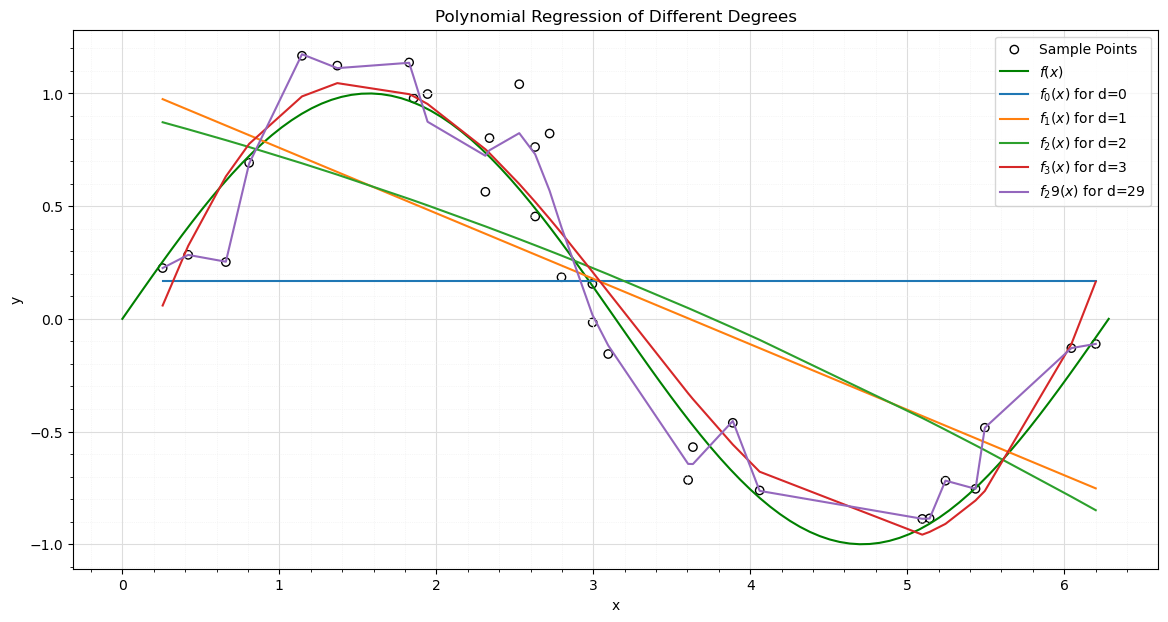

In [49]:
# Initialize plot for the true function, estimated functions, and sample points
plt.figure(figsize=(14, 7))
plt.scatter(x_vals, y_vals, facecolors='none', edgecolors='black', label='Sample Points')
x_true = np.linspace(0, 2*np.pi, 100)
y_true = np.sin(x_true)
plt.plot(x_true, y_true, label='$f(x)$', color='green')

# Perform polynomial regression and plot for each degree
for d in degrees:
    y_fitted, _ = polynomial_regression(x_vals, y_vals, d)
    plt.plot(np.sort(x_vals), y_fitted[np.argsort(x_vals)], label=f'$f_{d}(x)$ for d={d}')

# Formatting the plot
plt.title('Polynomial Regression of Different Degrees')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#plt.grid(True)
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
plt.minorticks_on()
plt.show()


# Chabge so 
# x,y -> y-hat
# x,y -> a0x^0 + anx^n + .... + anx^28


#f^d(x~) = a^ox~0 + 

## Question 1.2cii

C:\Users\mario\AppData\Local\Temp\ipykernel_17132\2276140358.py:4: RankWarning: Polyfit may be poorly conditioned
  _, p = polynomial_regression(x_vals, y_vals, d)


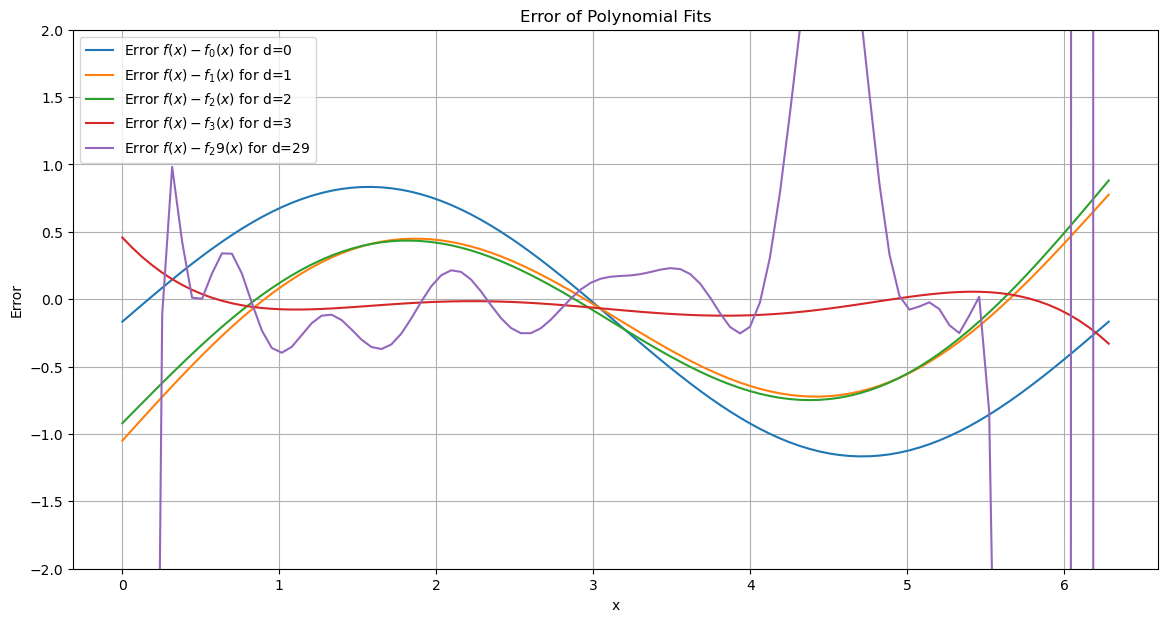

In [50]:
# Error plot for f(x) - f_d(x)
plt.figure(figsize=(14, 7))
for d in degrees:
    _, p = polynomial_regression(x_vals, y_vals, d)
    y_pred = p(x_true)
    plt.plot(x_true, y_true - y_pred, label=f'Error $f(x) - f_{d}(x)$ for d={d}')

ax = plt.gca()
ax.set_ylim([-2, 2])
plt.title('Error of Polynomial Fits')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

## Question 1.2ciii

C:\Users\mario\AppData\Local\Temp\ipykernel_17132\120295111.py:4: RankWarning: Polyfit may be poorly conditioned
  _, p = polynomial_regression(x_vals, y_vals, d)


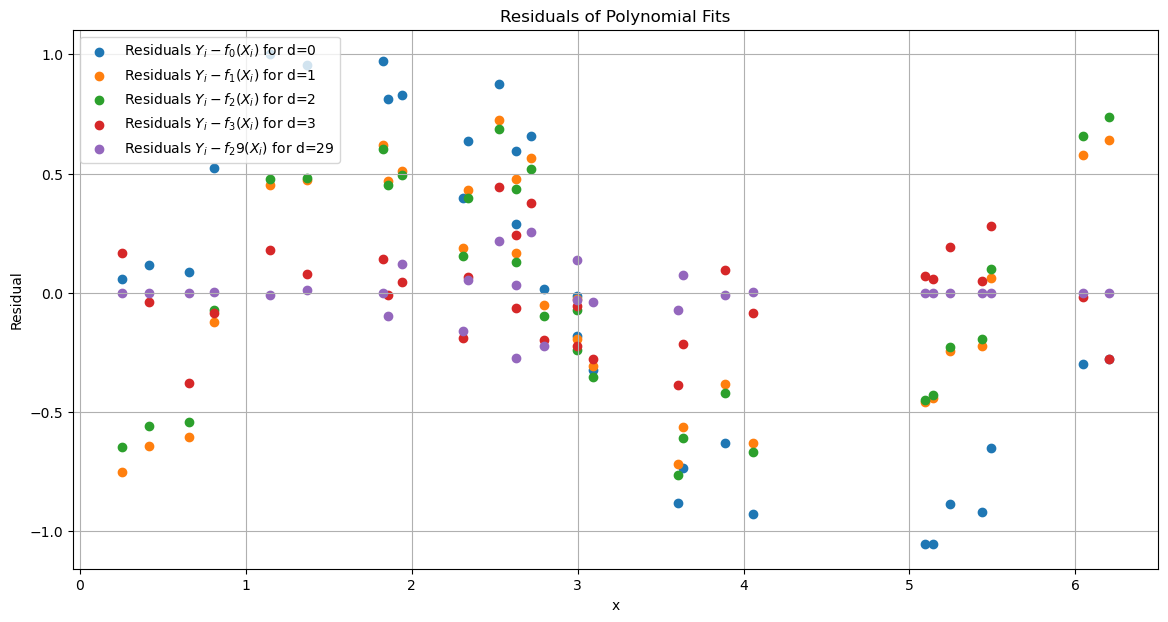

In [51]:
# Residuals plot for Y_i - f_d(X_i)
plt.figure(figsize=(14, 7))
for d in degrees:
    _, p = polynomial_regression(x_vals, y_vals, d)
    y_pred = p(x_vals)
    plt.scatter(x_vals, y_vals - y_pred, label=f'Residuals $Y_i - f_{d}(X_i)$ for d={d}')


plt.title('Residuals of Polynomial Fits')
plt.xlabel('x')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

## Question 2d

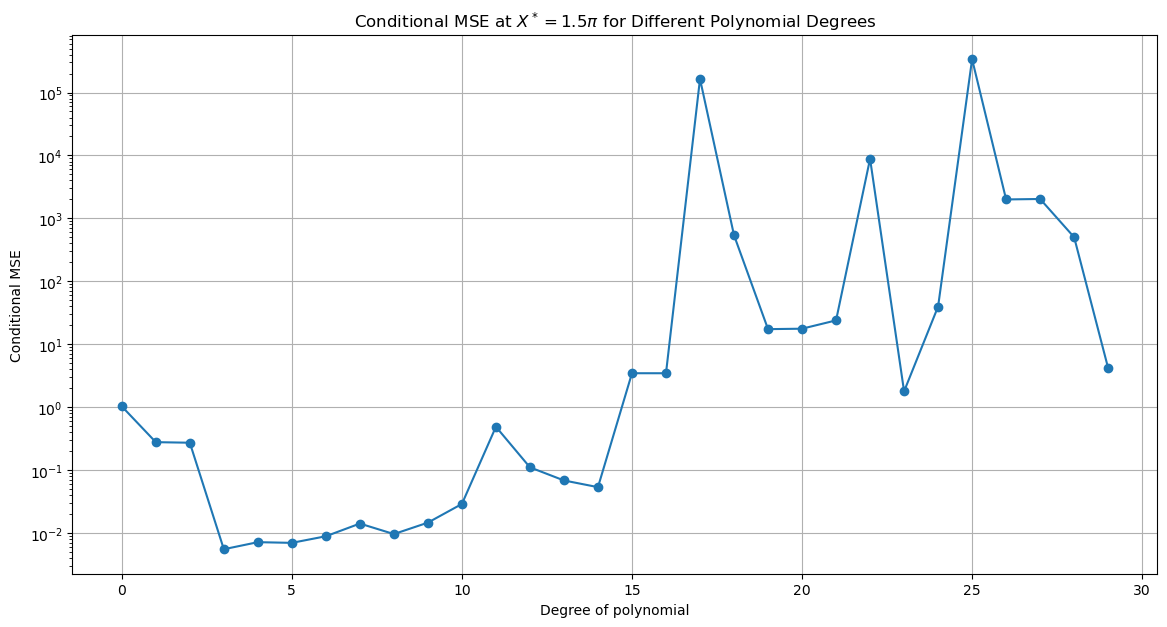

In [10]:
# Plot Bias and Variance

import warnings
warnings.filterwarnings("ignore")


degrees = range(30)
n_simulations = 100
n_samples = 30
X_star = 1.5 * np.pi
conditional_MSEs = []

#Mean Squared Error
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Simulation to calculate conditional MSE for each degree
for d in degrees:
    simulation_MSEs = []
    for _ in range(n_simulations):
        # Generate new samples
        x_vals, y_vals = generate_sample(n = n_samples, seed = np.random.seed())
        
        # Fit polynomial to the new sample
        y_fitted, poly = polynomial_regression(x_vals, y_vals, d)
        
        # Predict at X_star and calculate MSE
        y_pred_star = poly(X_star)
        y_true_star = np.sin(X_star)
        
        
        simulation_MSEs.append(mse(np.array([y_true_star]), np.array([y_pred_star])))
    
    conditional_MSEs.append(np.mean(simulation_MSEs))

# Plotting the conditional MSE against degrees
plt.figure(figsize=(14, 7))
plt.plot(degrees, conditional_MSEs, marker='o', linestyle='-')
plt.title('Conditional MSE at $X^* = 1.5\pi$ for Different Polynomial Degrees')
plt.xlabel('Degree of polynomial')
plt.ylabel('Conditional MSE')
plt.yscale('log')  # Using logarithmic scale for better visualization
plt.grid(True)
plt.show()


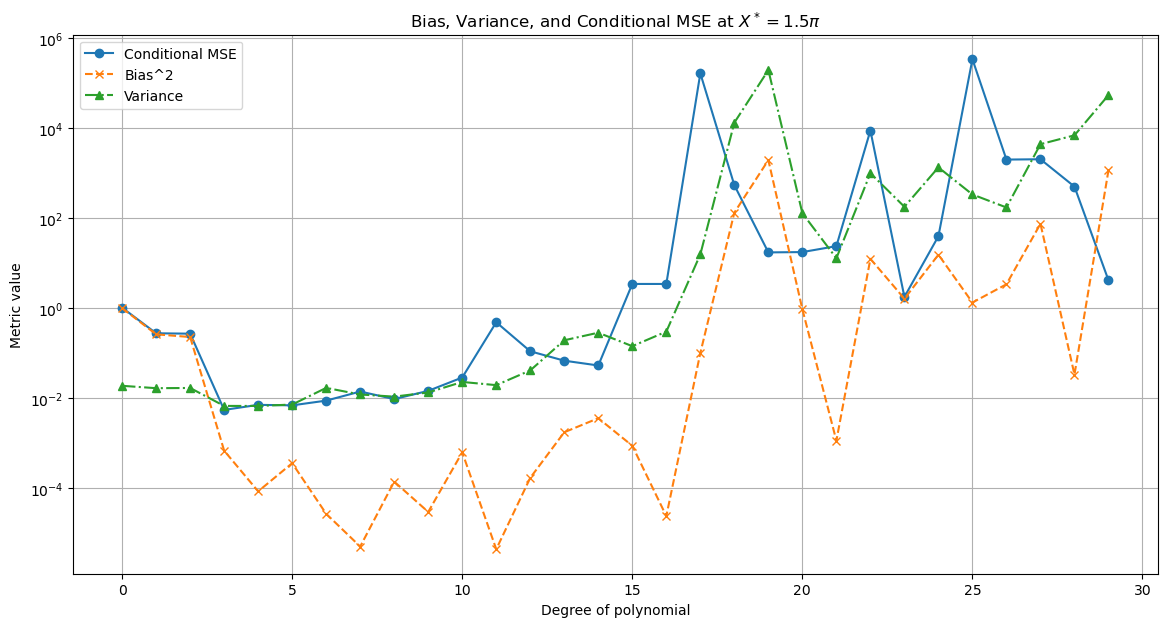

In [11]:
# Compute Bias and Variance
biases = []
variances = []

for d in degrees:
    simulation_predictions = []
    for _ in range(n_simulations):
        x_vals, y_vals = generate_sample(n=n_samples, seed=np.random.seed())
        _, poly = polynomial_regression(x_vals, y_vals, d)
        y_pred_star = poly(X_star)
        simulation_predictions.append(y_pred_star)
        
    # Compute the average prediction for the current degree
    average_prediction = np.mean(simulation_predictions)
    # Bias^2
    bias_sq = (average_prediction - np.sin(X_star)) ** 2
    biases.append(bias_sq)
    # Variance
    variance = np.var(simulation_predictions)
    variances.append(variance)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(degrees, conditional_MSEs, marker='o', linestyle='-', label='Conditional MSE')
plt.plot(degrees, biases, marker='x', linestyle='--', label='Bias^2')
plt.plot(degrees, variances, marker='^', linestyle='-.', label='Variance')
plt.title('Bias, Variance, and Conditional MSE at $X^* = 1.5\pi$')
plt.xlabel('Degree of polynomial')
plt.ylabel('Metric value')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


## Question 2.3

I think Breiman would think that this exercise shows the data modeling culture and also shows some of the short comings of data modeling. These short comings can be viewed by the MSE, bias, and variance that increase when degrees increase and the importance of finding a "balance"/optimality when it comes to degrees and other parameters in data modeling.

## Question 2

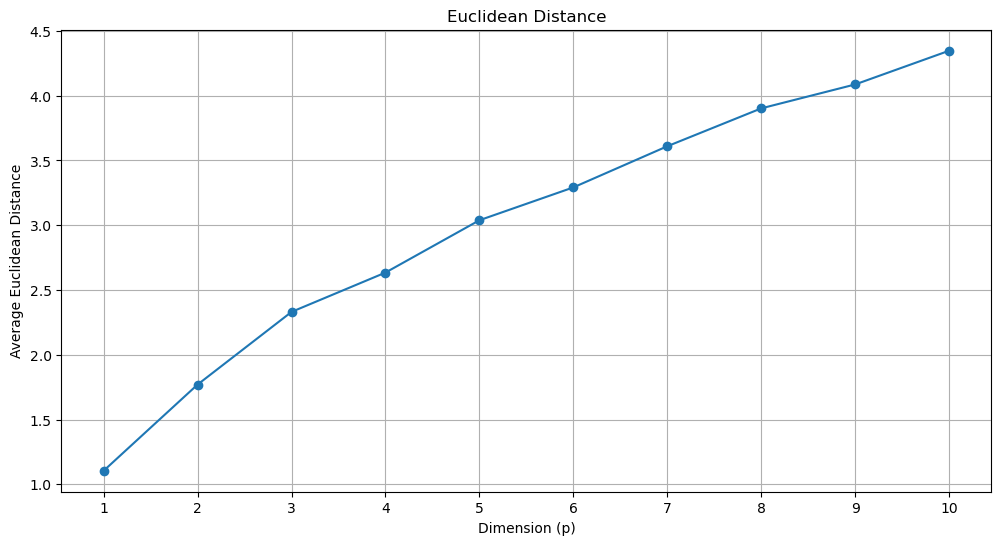

In [77]:
# Already defined function to generate vectors and calculate Euclidean distance
# Reusing this function to perform the task

def vect(p):
    # Generate two p-dimensional vectors with i.i.d. standard normal components
    X1 = np.random.normal(0, 1, p)
    X2 = np.random.normal(0, 1, p)
    
    # Calculate the Euclidean distance between the two vectors
    distance = np.linalg.norm(X1 - X2)
    
    return distance

# Define the dimensions to test
dimensions = range(1, 11)
num_executions = 1000
dis_per_d = []

# Execute the function 1000 times for each dimension and calculate the average distance
for p in dimensions:
    dist = [vect(p) for _ in range(num_executions)]
    avg_distance = np.mean(dist)
    dis_per_d.append(avg_distance)

# Plot the average distances as a function of dimension p
plt.figure(figsize=(12, 6))
plt.plot(dimensions, dis_per_d, marker='o')
plt.title('Euclidean Distance')
plt.xlabel('Dimension (p)')
plt.ylabel('Average Euclidean Distance')
plt.xticks(dimensions)
plt.grid(True)
plt.show()


## Question 1.3